In [94]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [95]:
vidoe_games_sales = pd.read_csv('vidoe_game_sales.csv')
vidoe_games_sales = vidoe_games_sales[vidoe_games_sales['Genre']=='Shooter']
print(vidoe_games_sales)


                                                    Name Platform  \
9                                              Duck Hunt      NES   
29                        Call of Duty: Modern Warfare 3     X360   
31                             Call of Duty: Black Ops 3      PS4   
32                               Call of Duty: Black Ops     X360   
34                            Call of Duty: Black Ops II      PS3   
...                                                  ...      ...   
16580                DoDonPachi Daifukkatsu: Black Label     X360   
16581                                      Space Raiders       GC   
16606  Transformers: War for Cybertron (XBox 360, PS3...       PC   
16700                                             Breach       PC   
16710                      Men in Black II: Alien Escape       GC   

       Year_of_Release    Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
9               1984.0  Shooter    Nintendo     26.93      0.63      0.28   
29              2

In [96]:
#since i want to predict global sales i don't need other's sales and name of the game developer and publisher seems have no effect on sales and critic and user counts it's just number review and nothing to do with sales
vidoe_games_sales = vidoe_games_sales.drop(labels=['Developer','Name','NA_Sales','EU_Sales','JP_Sales','EU_Sales','Other_Sales','Publisher','User_Count','Critic_Count'],axis=1,)


In [97]:
vidoe_games_sales=vidoe_games_sales.dropna()

,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,User_Score,Rating
29,X360,2011.0,Shooter,14.73,88.0,3.4,M
32,X360,2010.0,Shooter,14.61,87.0,6.3,M
34,PS3,2012.0,Shooter,13.79,83.0,5.3,M
35,X360,2012.0,Shooter,13.67,83.0,4.8,M
36,X360,2009.0,Shooter,13.47,94.0,6.3,M
...,...,...,...,...,...,...,...
842,X360,2005.0,Shooter,2.03,89.0,8.1,T
847,XOne,2013.0,Shooter,2.02,81.0,6.6,M
872,X360,2006.0,Shooter,1.95,88.0,8.3,M
874,X360,2012.0,Shooter,1.95,67.0,5.0,M


In [99]:
#here  i tried to encode some categorical data since i want to user a regression model
from sklearn.preprocessing import LabelEncoder
platform = vidoe_games_sales['Platform']

label_encoder = LabelEncoder()
label_encoder.fit(vidoe_games_sales['Platform'])
new_platform = label_encoder.transform(vidoe_games_sales['Platform'])

vidoe_games_sales.loc[:,'Platform'] = new_platform


,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,User_Score,Rating
29,14,2011.0,Shooter,14.73,88.0,3.4,M
32,14,2010.0,Shooter,14.61,87.0,6.3,M
34,8,2012.0,Shooter,13.79,83.0,5.3,M
35,14,2012.0,Shooter,13.67,83.0,4.8,M
36,14,2009.0,Shooter,13.47,94.0,6.3,M


In [101]:
from sklearn.preprocessing import LabelEncoder
Rating = vidoe_games_sales['Rating']

label_encoder = LabelEncoder()
label_encoder.fit(vidoe_games_sales['Rating'])

encoded_rating = label_encoder.transform(vidoe_games_sales['Rating'])

vidoe_games_sales.loc[:,'Rating'] = encoded_rating

In [102]:
#in this section we drop Genre from our data set
vidoe_games_sales = vidoe_games_sales.drop(['Genre'],axis=1)

In [103]:
#and here i tried to find out relation between my datas 
vidoe_games_sales.corr()

,Platform,Year_of_Release,Global_Sales,Critic_Score,User_Score,Rating
Platform,1.000000,0.148770,0.166645,-0.018276,-0.044846,0.030693
Year_of_Release,0.148770,1.000000,0.156976,0.046436,-0.311272,-0.197999
Global_Sales,0.166645,0.156976,1.000000,0.349490,-0.033586,-0.028926
Critic_Score,-0.018276,0.046436,0.349490,1.000000,0.563582,-0.074057
User_Score,-0.044846,-0.311272,-0.033586,0.563582,1.000000,-0.002550
Rating,0.030693,-0.197999,-0.028926,-0.074057,-0.002550,1.000000


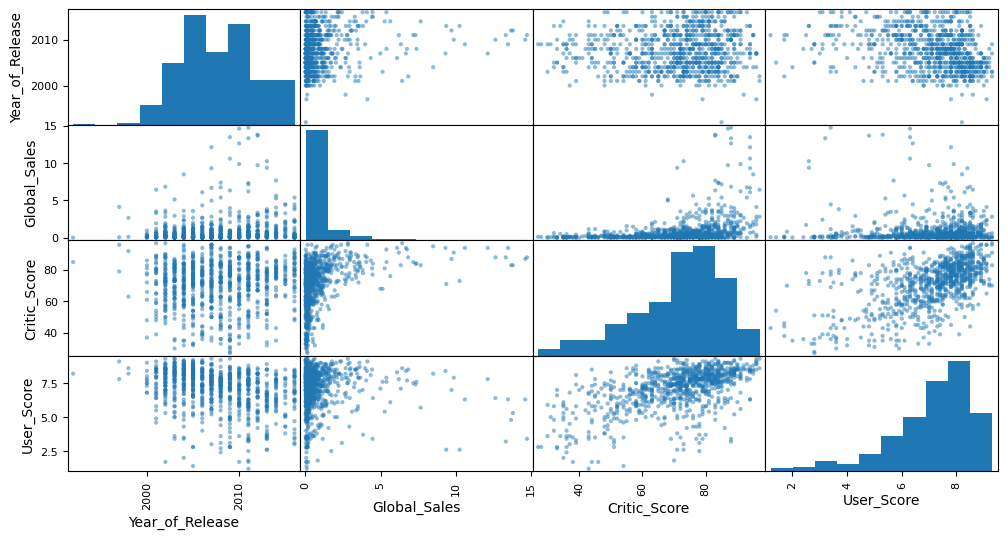

In [104]:
from pandas.plotting import scatter_matrix
attibutes = ['Platform','Year_of_Release','Global_Sales','Critic_Score', 'Rating','User_Score']
scatter_matrix(vidoe_games_sales[attibutes],figsize=(12,6));

In [112]:
from sklearn.model_selection import train_test_split
#since user score and rating have less effect on our global sales i consider to don't use them
train_x,test_x,train_y,test_y = train_test_split(vidoe_games_sales[['Platform','Year_of_Release','Critic_Score']],vidoe_games_sales['Global_Sales'],test_size=0.2)


(864, 6)
0.01


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_x = scaler.fit_transform(train_x)
scaled_test_x = scaler.transform(test_x)

MinMaxScaler()


In [113]:
#thise lines is bit useless but after i rescaled my input data they don't have their own labels so  attached their labels to them again
scaled_train_x = pd.DataFrame(scaled_train_x,columns=['Platform','Year_of_Release','Critic_Score'])
scaled_test_x = pd.DataFrame(scaled_test_x,columns=['Platform','Year_of_Release','Critic_Score'])

In [116]:
print(scaled_train_x)

     Platform  Year_of_Release  Critic_Score
0      0.1875         0.500000      0.342857
1      0.3125         0.791667      0.785714
2      0.3125         0.625000      0.985714
3      0.3125         0.791667      0.857143
4      0.5000         0.833333      0.414286
..        ...              ...           ...
686    0.3125         0.750000      0.514286
687    0.8750         0.750000      0.085714
688    0.4375         0.541667      0.628571
689    0.3125         0.708333      0.700000
690    0.5000         0.666667      0.500000

[691 rows x 3 columns]


In [120]:
from sklearn.ensemble import  RandomForestRegressor
rfg = RandomForestRegressor(max_depth=100,n_estimators=100,random_state=True)
rfg.fit(X=scaled_train_x,y = train_y)

RandomForestRegressor(max_depth=100, random_state=True)

In [123]:
pred_y = rfg.predict(scaled_test_x)


In [125]:
#evaluted_predictions
from sklearn.metrics import  root_mean_squared_error,r2_score
print(root_mean_squared_error(test_y,pred_y))
print(r2_score(test_y,pred_y))


2.351095229033265
-0.27358144520340133


In [131]:
def write_on_file(models_names,predictions,actual_values):
    with open('models_accuracy_results.txt', 'a') as file:
        file.write(f'{models_names}:\n')
        file.write(f'   RMSE: {root_mean_squared_error(actual_values,predictions)}\n')
        file.write(f'   R2: {r2_score(actual_values,predictions)}\n')
        file.write('-'*100+'\n')
        file.close()

In [132]:
write_on_file(models_names='Random Forest Regressor',predictions=pred_y,actual_values=test_y)